<a href="https://colab.research.google.com/github/majd1988shahin/DLM/blob/master/L04/Funktional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np



In [3]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
y_test

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
flat_input_train = np.reshape(x_train,(len(x_train),-1))
print(flat_input_train.shape)
flat_input_test=np.reshape(x_test,(len(x_test),-1))

average_image = np.reshape(np.array([x_train[:,x,y].mean() 
    for x in range(0,28) for y in range(0,28)]),(28,28))

for i in range(0,10):
    
    img = x_train[np.where(y_train==i)[0][0] ,:,:]#erses Bilde von Klasse i ist 
    img_average = img -average_image
        
    # get some image
    plt.figure(i)
    plt.imshow(img_average,cmap="gray")

    plt.figure(i+100)
    plt.hist(img_average.flatten())
    plt.figure(i+200) 
    plt.hist(img.flatten())

flat_input_train_minus_averaged=flat_input_train-img_average.flatten()
flat_input_test_minus_averaged=flat_input_test-img_average.flatten()

In [0]:
from keras.utils import to_categorical

y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

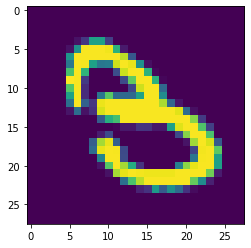

In [6]:
plt.imshow(x_test[18,:,:])

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense

def create_model():
    inputs = Input(shape=(flat_input_train.shape[1],))
    #inputs = Input((784,))
# a layer instance is callable on a tensor, and returns a tensor

    x = Dense(32, activation='relu')(inputs)
   # inputs=Input(shape=(32,))
    x = Dense(64, activation='relu')(x)
    

   # x = Dense(4, activation='hard_sigmoid')(x)
   # x = Dense(10, activation='hard_sigmoid')(x)

    predictions = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    #model.add(Dense(32, input_dim=flat_input_train.shape[1]))
    
    #model.add(Dense(64,activation="relu"))
    
    # Final layer - choose the amount of classes
    #model.add(Dense(10,activation="softmax"))
    return model



In [0]:
optimizer = "adadelta"
np.random
   # print("optimizers_to_test :" ,optimizer)
model = create_model()
    
model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
hist = model.fit(flat_input_train,y_train_cat,validation_data=\
              (flat_input_test,y_test_cat),epochs=1)
    
plt.figure(999)
plt.plot(hist.history["loss"])
plt.title("Training Loss")
   
plt.figure(998)
plt.plot(hist.history["val_loss"])
plt.title("Validation Loss")
    
plt.figure(888)
plt.plot(hist.history["acc"])
plt.title("Trainings Accuracy")
    
plt.figure(887)
plt.plot(hist.history["val_acc"])
plt.title("Validation Accuracy")
y=model.predict(flat_input_test)
print(model.summary())

In [0]:
model.summary()

InputLayer ist bei sequential nicht stattgefunden !

In [0]:
i=737

x1=[list(y[i,:]).index(max(list(y[i,:]))) for i in range(0,10000) ]
print(*zip(y_test,x1))
print(y_test[i],y[i])
print(sum(x1==y_test))


# Merge Layer

In [0]:
input1= Input(shape=(16,))
x=Dense(8,activation="relu")(input1)

from keras.layers import Concatenate
concated=Concatenate()([x,input1])
out =Dense(1,activation="linear")(concated)
model2=Model(inputs=input1, outputs=out)
model2.compile("adam","mean_squared_error", metrics=['accuracy'])

In [0]:
np.random.seed(15)
X=np.random.randint(0,100,size=(100,16))
Y=[np.mean(X[i,:]) for i in range(0,100)]
model2.fit(X,Y,epochs=100)


In [367]:
np.mean(abs(model2.predict(X)-Y))

7.33534662399292

# Aufgabe4

In [34]:
from keras.layers import Concatenate

inputs = Input(name="inputs",shape=(flat_input_train.shape[1],))
x1=Dense(64,activation="relu",name="x1")(inputs)
x2=Dense(64,activation="relu",name="x2")(x1)
concatenate1=Concatenate(name="concatenate1")([x1,x2])
x3=Dense(64,activation="relu",name="x3")(concatenate1)
concatenate2=Concatenate(name="concatenate2")([x3,x1])
outputs=Dense(10,activation="softmax",name="output")(concatenate2)

model3=Model(inputs=inputs,outputs=outputs)
model3.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 784)          0                                            
__________________________________________________________________________________________________
x1 (Dense)                      (None, 64)           50240       inputs[0][0]                     
__________________________________________________________________________________________________
x2 (Dense)                      (None, 64)           4160        x1[0][0]                         
__________________________________________________________________________________________________
concatenate1 (Concatenate)      (None, 128)          0           x1[0][0]                         
                                                                 x2[0][0]                  

In [0]:
model3.compile("adamax",loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [39]:
np.random.seed(2)
model3.fit(flat_input_train,y_train_cat,
           validation_data=(flat_input_test,y_test_cat),epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 68us/step - loss: 2.4562 - acc: 0.8432 - val_loss: 2.3110 - val_acc: 0.8530
Epoch 2/15
60000/60000 [==============================] - 4s 65us/step - loss: 2.3095 - acc: 0.8526 - val_loss: 2.1795 - val_acc: 0.8614
Epoch 3/15
60000/60000 [==============================] - 4s 63us/step - loss: 2.2509 - acc: 0.8568 - val_loss: 2.2336 - val_acc: 0.8580
Epoch 4/15
60000/60000 [==============================] - 4s 63us/step - loss: 2.2224 - acc: 0.8587 - val_loss: 2.1651 - val_acc: 0.8627
Epoch 5/15
60000/60000 [==============================] - 4s 65us/step - loss: 2.1755 - acc: 0.8619 - val_loss: 2.1415 - val_acc: 0.8641
Epoch 6/15
60000/60000 [==============================] - 4s 64us/step - loss: 2.1589 - acc: 0.8629 - val_loss: 2.1447 - val_acc: 0.8640
Epoch 7/15
60000/60000 [==============================] - 4s 63us/step - loss: 2.1094 - acc: 0.8660 - val_loss: 2.1717 - val_acc

In [40]:
import os , sys
from google.colab import drive
drive.mount('/content/drive') #get access to drive

os.chdir("/content/drive/My Drive/PYP") # change working directory
print(os.getcwd())# read current work direktory
model3.save("Aufgabe4.hdf5")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/PYP


In [41]:
!ls

Aufgabe4.hdf5  foo.txt	hi  imgs
